<h1>House Price Prediction Model</h1>

<p>We'll be trying to predict the house price prediction using the regression model .</p>


<h4><b>check out data</b></h4>
<p>Let's extract insights from the data to achieve this get our environment ready with the libraries we'll need and then import the data!</p>

In [2]:
import pandas as pd # linear Algebra
import numpy as np # data processing

from scipy import stats
from scipy.stats import norm, skew

import matplotlib.pyplot as plt

import seaborn as sns


##---------------------------
from scipy.stats import chi2_contingency

from itertools import combinations
from sklearn.preprocessing import LabelEncoder

#------
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('train.csv')

In [4]:
print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
print(train.info())
print("*"*100)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<h4> <b>Data Overview :</b> </h4>
<p>Let's understand what data is trying to say us ? We need to analyse the data . Analysing data is the most important thing to understand what data is telling us .</p>
<h5><b>brief explaination of Data</b> (we find the in data description file):</h5>
<ul>
    <li><b>SalePrice:</b> The property's sale price in dollars. This is the target variable that you're trying to predict.</li>
    <li><b>MSSubClass:</b> The building class</li>
    <li><b>MSZoning:</b> The general zoning classification</li>
    <li><b>LotFrontage:</b> Linear feet of street connected to property</li>
    <li><b>LotArea:</b> Lot size in square feet</li>
    <li><b>Street:</b> Type of road access</li>
    <li><b>Alley:</b> Type of alley access</li>
    <li><b>LotShape:</b> General shape of property</li>
    <li><b>LandContour:</b> Flatness of the property</li>
    <li><b>Utilities:</b> Type of utilities available</li>
    <li><b>LotConfig:</b> Lot configuration</li>
    <li><b>LandSlope:</b> Slope of property</li>
    <li><b>Neighborhood:</b> Physical locations within Ames city limits</li>
    <li><b>Condition1:</b> Proximity to main road or railroad</li>
    <li><b>Condition2:</b> Proximity to main road or railroad (if a second is present)</li>
    <li><b>BldgType:</b> Type of dwelling</li>
    <li><b>HouseStyle:</b> Style of dwelling</li>
    <li><b>OverallQual:</b> Overall material and finish quality</li>
    <li><b>OverallCond:</b> Overall condition rating</li>
    <li><b>YearBuilt:</b> Original construction date</li>
    <li><b>YearRemodAdd:</b> Remodel date</li>
    <li><b>RoofStyle:</b> Type of roof</li>
    <li><b>RoofMatl:</b> Roof material</li>
    <li><b>Exterior1st:</b> Exterior covering on house</li>
    <li><b>Exterior2nd:</b> Exterior covering on house (if more than one material)</li>
    <li><b>MasVnrType:</b> Masonry veneer type</li>
    <li><b>MasVnrArea:</b> Masonry veneer area in square feet</li>
    <li><b>ExterQual:</b> Exterior material quality</li>
    <li><b>ExterCond:</b> Present condition of the material on the exterior</li>
    <li><b>Foundation:</b> Type of foundation</li>
    <li><b>BsmtQual:</b> Height of the basement</li>
    <li><b>BsmtCond:</b> General condition of the basement</li>
    <li><b>BsmtExposure:</b> Walkout or garden level basement walls</li>
    <li><b>BsmtFinType1:</b> Quality of basement finished area</li>
    <li><b>BsmtFinSF1:</b> Type 1 finished square feet</li>
    <li><b>BsmtFinType2:</b> Quality of second finished area (if present)</li>
    <li><b>BsmtFinSF2:</b> Type 2 finished square feet</li>
    <li><b>BsmtUnfSF:</b> Unfinished square feet of basement area</li>
    <li><b>TotalBsmtSF:</b> Total square feet of basement area</li>
    <li><b>Heating:</b> Type of heating</li>
    <li><b>HeatingQC:</b> Heating quality and condition</li>
    <li><b>CentralAir:</b> Central air conditioning</li>
    <li><b>Electrical:</b> Electrical system</li>
    <li><b>1stFlrSF:</b> First Floor square feet</li>
    <li><b>2ndFlrSF:</b> Second floor square feet</li>
    <li><b>LowQualFinSF:</b> Low quality finished square feet (all floors)</li>
    <li><b>GrLivArea:</b> Above grade (ground) living area square feet</li>
    <li><b>BsmtFullBath:</b> Basement full bathrooms</li>
    <li><b>BsmtHalfBath:</b> Basement half bathrooms</li>
    <li><b>FullBath:</b> Full bathrooms above grade</li>
    <li><b>HalfBath:</b> Half baths above grade</li>
    <li><b>Bedroom:</b> Number of bedrooms above basement level</li>
    <li><b>Kitchen:</b> Number of kitchens</li>
    <li><b>KitchenQual:</b> Kitchen quality</li>
    <li><b>TotRmsAbvGrd:</b> Total rooms above grade (does not include bathrooms)</li>
    <li><b>Functional:</b> Home functionality rating</li>
    <li><b>Fireplaces:</b> Number of fireplaces</li>
    <li><b>FireplaceQu:</b> Fireplace quality</li>
    <li><b>GarageType:</b> Garage location</li>
    <li><b>GarageYrBlt:</b> Year garage was built</li>
    <li><b>GarageFinish:</b> Interior finish of the garage</li>
    <li><b>GarageCars:</b> Size of garage in car capacity</li>
    <li><b>GarageArea:</b> Size of garage in square feet</li>
    <li><b>GarageQual:</b> Garage quality</li>
    <li><b>GarageCond:</b> Garage condition</li>
    <li><b>PavedDrive:</b> Paved driveway</li>
    <li><b>WoodDeckSF:</b> Wood deck area in square feet</li>
    <li><b>OpenPorchSF:</b> Open porch area in square feet</li>
    <li><b>EnclosedPorch:</b> Enclosed porch area in square feet</li>
    <li><b>3SsnPorch:</b> Three season porch area in square feet</li>
    <li><b>ScreenPorch:</b> Screen porch area in square feet</li>
    <li><b>PoolArea:</b> Pool area in square feet</li>
    <li><b>PoolQC:</b> Pool quality</li>
    <li><b>Fence:</b> Fence quality</li>
    <li><b>MiscFeature:</b> Miscellaneous feature not covered in other categories</li>
    <li><b>MiscVal:</b> $Value of miscellaneous feature</li>
    <li><b>MoSold:</b> Month Sold</li>
    <li><b>YrSold:</b> Year Sold</li>
    <li><b>SaleType:</b> Type of sale</li>
    <li><b>SaleCondition:</b> Condition of sale</li>
</ul>


<h3><b>Data Preprocessing</b><h3>

In [6]:
def missing_values_in_column(train):
    # aim : function responsible for removing the detail about the missing values and missing value percentage in the column
    # Count missing values per column
    missing_value = train.isna().sum().sort_values(ascending=False)
    missing_value = missing_value.to_frame(name='Missing values').reset_index()
    missing_value.rename(columns={'index': 'col'}, inplace=True)

    # Percentage of missing values per column
    percentage_of_missing_values = (train.isna().sum() / len(train)) * 100
    percentage_of_missing_values = percentage_of_missing_values.to_frame(name='Percentage').reset_index()
    percentage_of_missing_values.rename(columns={'index': 'col'}, inplace=True)

    # # Merge the two DataFrames
    merge_df = pd.merge(missing_value, percentage_of_missing_values, on='col', how="outer")

    # Display result
    merge_df = merge_df.sort_values(ascending=False, by='Missing values')

    return merge_df

In [7]:
"""
    aim : count the missing values in the data .
"""

detail = missing_values_in_column(train=train)
print(detail.head(15))


             col  Missing values  Percentage
66        PoolQC            1453   99.520548
57   MiscFeature            1406   96.301370
3          Alley            1369   93.767123
25         Fence            1179   80.753425
56    MasVnrType             872   59.726027
26   FireplaceQu             690   47.260274
50   LotFrontage             259   17.739726
34  GarageFinish              81    5.547945
35    GarageQual              81    5.547945
36    GarageType              81    5.547945
37   GarageYrBlt              81    5.547945
33    GarageCond              81    5.547945
7   BsmtExposure              38    2.602740
11  BsmtFinType2              38    2.602740
14      BsmtQual              37    2.534247



<h5><b>Column Need to remove </b></h5>
    <ul>
        <li>1. PoolQC</li>
        <li>2. MiscFeature</li>
        <li>3. Alley</li>
        <li>4. Fence</li>
        <li>5. MasVnrType</li>
        <li>6. FrePlaceQu</li>
        <li>7. LotFrontage</li>
    </ul>
    
<p> reason : having high missing values which cannot be fixed .</p>

<h5><b>handling missing value in column . </b></h5>
    <ul>
        <li>1. GarageFinish</li>
        <li>2. GarageCond</li>
        <li>3. GarageYrBlt</li>
        <li>4. GarageType</li>
        <li>5. BsmtFlnType2</li>
        <li>6. BsmtExposure</li>
        <li>7. BsmtQual</li>
        <li>8. BsmtFinType1</li>
        <li>9. BsmtCond</li>
        <li>10. MasVnrArea</li>
        <li>11 . Electrical</li>
    </ul>


In [8]:
# removing the columns 

train = train.drop(columns=['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage'])

print("missing values after dropping the columns :")
# running piece of code cheack the column has removed or or 
missing_value = train.isna().sum().sort_values(ascending=False)
missing_value = missing_value.to_frame(name='Missing values').reset_index()
missing_value.rename(columns={'index': 'col'}, inplace=True)

# Percentage of missing values per column
percentage_of_missing_values = (train.isna().sum() / len(train)) * 100
percentage_of_missing_values = percentage_of_missing_values.to_frame(name='Percentage').reset_index()
percentage_of_missing_values.rename(columns={'index': 'col'}, inplace=True)

# # Merge the two DataFrames
merge_df = pd.merge(missing_value, percentage_of_missing_values, on='col', how="outer")

# Display result
merge_df = merge_df.sort_values(ascending=False, by='Missing values')

merge_df.head(25)


missing values after dropping the columns :


,col,Missing values,Percentage
34,GarageYrBlt,81,5.547945
32,GarageQual,81,5.547945
30,GarageCond,81,5.547945
31,GarageFinish,81,5.547945
33,GarageType,81,5.547945
6,BsmtExposure,38,2.602740
10,BsmtFinType2,38,2.602740
5,BsmtCond,37,2.534247
9,BsmtFinType1,37,2.534247
13,BsmtQual,37,2.534247


In [9]:
# handling the missing value GarageFinish
print(train['GarageFinish'].value_counts())
print("-*-"*50)

# now updating the values with "Unf" that is occuring more frequently
train['GarageFinish'] = train['GarageFinish'].fillna("Unf")
print(f"Count of null value in GarageFinish = {train['GarageFinish'].isnull().sum()}")



GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Count of null value in GarageFinish = 0


In [10]:
# handling the missing value from GarageCond column

print(train['GarageCond'].value_counts())
print("-*-"*50)

# now updating the values with "TA" that is occuring more frequently
train['GarageCond'] = train['GarageCond'].fillna("TA")
print(f"Count of null value in GarageCondn = {train['GarageCond'].isnull().sum()}")


GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Count of null value in GarageCondn = 0


In [11]:
# handling the missing value from GarageYrBlt column

print(train['GarageYrBlt'].value_counts())
print("-*-"*50)

train['GarageYrBlt'].dtype # float data type

# now updating the values with "TA" that is occuring more frequently
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0])
print(f"Count of null value in GarageYrBlt = {train['GarageYrBlt'].isnull().sum()}")

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Count of null value in GarageYrBlt = 0


In [12]:
# handling the missing value from GarageType column

print(train['GarageType'].value_counts())
print("-*-"*50)

# now updating the values with "Attchd" that is occuring more frequently
train['GarageType'] = train['GarageType'].fillna("Attchd")
print(f"Count of null value in GarageQual = {train['GarageType'].isnull().sum()}")

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Count of null value in GarageQual = 0


In [13]:
# handling the missing value from GarageQual column

print(train['GarageQual'].value_counts())
print("-*-"*50)

# now updating the values with "TA" that is occuring more frequently
train['GarageQual'] = train['GarageQual'].fillna("TA")
print(f"Count of null value in GarageQual = {train['GarageQual'].isnull().sum()}")

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Count of null value in GarageQual = 0


In [14]:
# handling the missing value from 'BsmtFinType2' column

print(train['BsmtFinType2'].value_counts())
print("-*-"*50)

# now updating the values with "Unf" that is occuring more frequently
train['BsmtFinType2'] = train['BsmtFinType2'].fillna("Unf")
print(f"Count of null value in BsmtFinType2 = {train['BsmtFinType2'].isnull().sum()}")

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Count of null value in BsmtFinType2 = 0


In [15]:

# handling the missing value from 'BsmtExposure' column

print(train['BsmtExposure'].value_counts())
print("-*-"*50)

# now updating the values with "No" that is occuring more frequently
train['BsmtExposure'] = train['BsmtExposure'].fillna("No")
print(f"Count of null value in BsmtExposure = {train['BsmtExposure'].isnull().sum()}")

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Count of null value in BsmtExposure = 0


In [16]:
print(missing_values_in_column(train))


             col  Missing values  Percentage
5       BsmtCond              37    2.534247
9   BsmtFinType1              37    2.534247
13      BsmtQual              37    2.534247
51    MasVnrArea               8    0.547945
18    Electrical               1    0.068493
..           ...             ...         ...
33    GarageType               0    0.000000
34   GarageYrBlt               0    0.000000
35     GrLivArea               0    0.000000
36      HalfBath               0    0.000000
73        YrSold               0    0.000000

[74 rows x 3 columns]


In [17]:
# handling the missing value from 'BsmtFinType1' column

print(train['BsmtFinType1'].value_counts())
print("-*-"*50)

# now updating the values with "Unf" that is occuring more frequently
train['BsmtFinType1'] = train['BsmtFinType1'].fillna("Unf")
print(f"Count of null value in BsmtFinType1 = {train['BsmtFinType1'].isnull().sum()}")

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Count of null value in BsmtFinType1 = 0


In [18]:
# handling the missing value from 'BsmtCond' column

print(train['BsmtCond'].value_counts())
print("-*-"*50)

# now updating the values with "TA" that is occuring more frequently
train['BsmtCond'] = train['BsmtCond'].fillna("TA")
print(f"Count of null value in BsmtCond = {train['BsmtCond'].isnull().sum()}")

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Count of null value in BsmtCond = 0


In [19]:
# handling the missing value from 'BsmtQual' column

print(train['BsmtQual'].value_counts())
print("-*-"*50)

# # now updating the values with "TA" that is occuring more frequently
train['BsmtQual'] = train['BsmtQual'].fillna("TA")
print(f"Count of null value in BsmtQual = {train['BsmtQual'].isnull().sum()}")

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Count of null value in BsmtQual = 0


In [20]:

# handling the missing value from 'MasVnrArea' column

print(train['MasVnrArea'].value_counts())
print("-*-"*50)

# now updating the values with "TA" that is occuring more frequently
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
print(f"Count of null value in MasVnrArea = {train['MasVnrArea'].isnull().sum()}")

MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Count of null value in MasVnrArea = 0


In [21]:
# Electrical

# handling the missing value from 'Electrical' column

print(train['Electrical'].value_counts())
print("-*-"*50)

# now updating the values with "SBrkr" that is occuring more frequently
train['Electrical'] = train['Electrical'].fillna('SBrkr')
print(f"Count of null value in Electrical = {train['Electrical'].isnull().sum()}")

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Count of null value in Electrical = 0


In [22]:
# validating that still there is any missing value in the data . 
missing_values_in_column(train)

,col,Missing values,Percentage
0,1stFlrSF,0,0.0
55,OpenPorchSF,0,0.0
53,MoSold,0,0.0
52,MiscVal,0,0.0
51,MasVnrArea,0,0.0
...,...,...,...
24,Fireplaces,0,0.0
23,Exterior2nd,0,0.0
22,Exterior1st,0,0.0
21,ExterQual,0,0.0


<h3><b>Data Visualization</b></h3>
<p>Let's look at the point visualization</p>

<b>1. Find Mean And Standard Deviation </b>
<ul>
    <li>
        <b>Mean :</b>
        <p> This represents the central tendency of house prices. It is calculated as:</p>
        <img src="images/mean.png" alt="Standard Deviation" width="400" height="200">
    </li>
    <li>
        <b>Standard Deviation :</b>
        <p> This measures the spread or variability of house prices around the mean. It is calculated as:</p>
        <img src="images/standard_deviation.jpg" alt="Standard Deviation" width="400" height="200">
    </li>
</ul>

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_12304\2024981094.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.hist(train['SalePrice'], bins=100, label='Sales dist. ($\mu$={:.2f} and $\sigma$={:.2f})'.format(mean, sigma), density=True) #  <-- plotting hisplot
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_12304\2024981094.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, p, 'r--', color='red', label='normal distribution') # <-- plotting graph


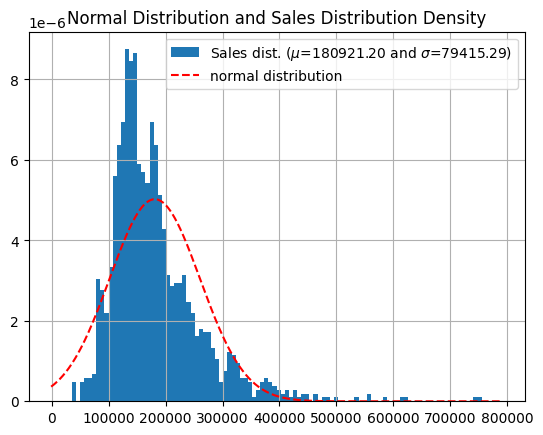

In [23]:
""" 
    Aim : To Check the normal distrution of the sales Price
"""

(mean, sigma) = norm.fit(train['SalePrice']) # <-- computing mean, sigma

plt.hist(train['SalePrice'], bins=100, label='Sales dist. ($\mu$={:.2f} and $\sigma$={:.2f})'.format(mean, sigma), density=True) #  <-- plotting hisplot 

x_min, x_max = plt.xlim() # <-- xlims function gives the current max and min value from the graph 
x = np.linspace(x_min, x_max, 1000) # <-- np.linespace generates the evenly spaces point between x_min, x_max
p = norm.pdf(x, mean, sigma) # <-- generates the pdf function for the normal distribution 

plt.plot(x, p, 'r--', color='red', label='normal distribution') # <-- plotting graph 
plt.legend() # <-- adding legends to the graph
plt.title("Normal Distribution and Sales Distribution Density") # <-- adding the title 
plt.grid(True) # <-- adding grid to the graph 
plt.show() # <-- plot the graphs 

<p><b>Observation :</b> We can conclude that data is right skewed .</p>


<h3><b>Correlation:</b></h3>
<p>Correlation is a statistical measure that describes the strength and direction of the relationship between two variables. It ranges from -1 to 1.</p>
<br>
<p>Types of <b>correlation</b></p>
<ul>
    <li>Positive Correlation (0 to +1) → When one variable increases, the other also increases.</li>
    <li>Negative Correlation (0 to -1) → When one variable increases, the other decreases.</li>
    <li>No Correlation (≈ 0) → No clear relationship between variables.</li>
</ul>

In [24]:
# Remove columns that has correlation less than 30 % 

corr = train.select_dtypes(include=[int,float]).corr() # getting correlation matrix from training data .
cols_to_remove = list(corr[abs(corr['SalePrice']) < 0.3].index) # cols with both negetive and positive correlation < 30 % with respect to total sales

print(f'Number of column having relation less than 30 % : {len(cols_to_remove)} i.e {cols_to_remove}')

train = train.drop(columns=cols_to_remove) # drop columns from train data set 


Number of column having relation less than 30 % : 19 i.e ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


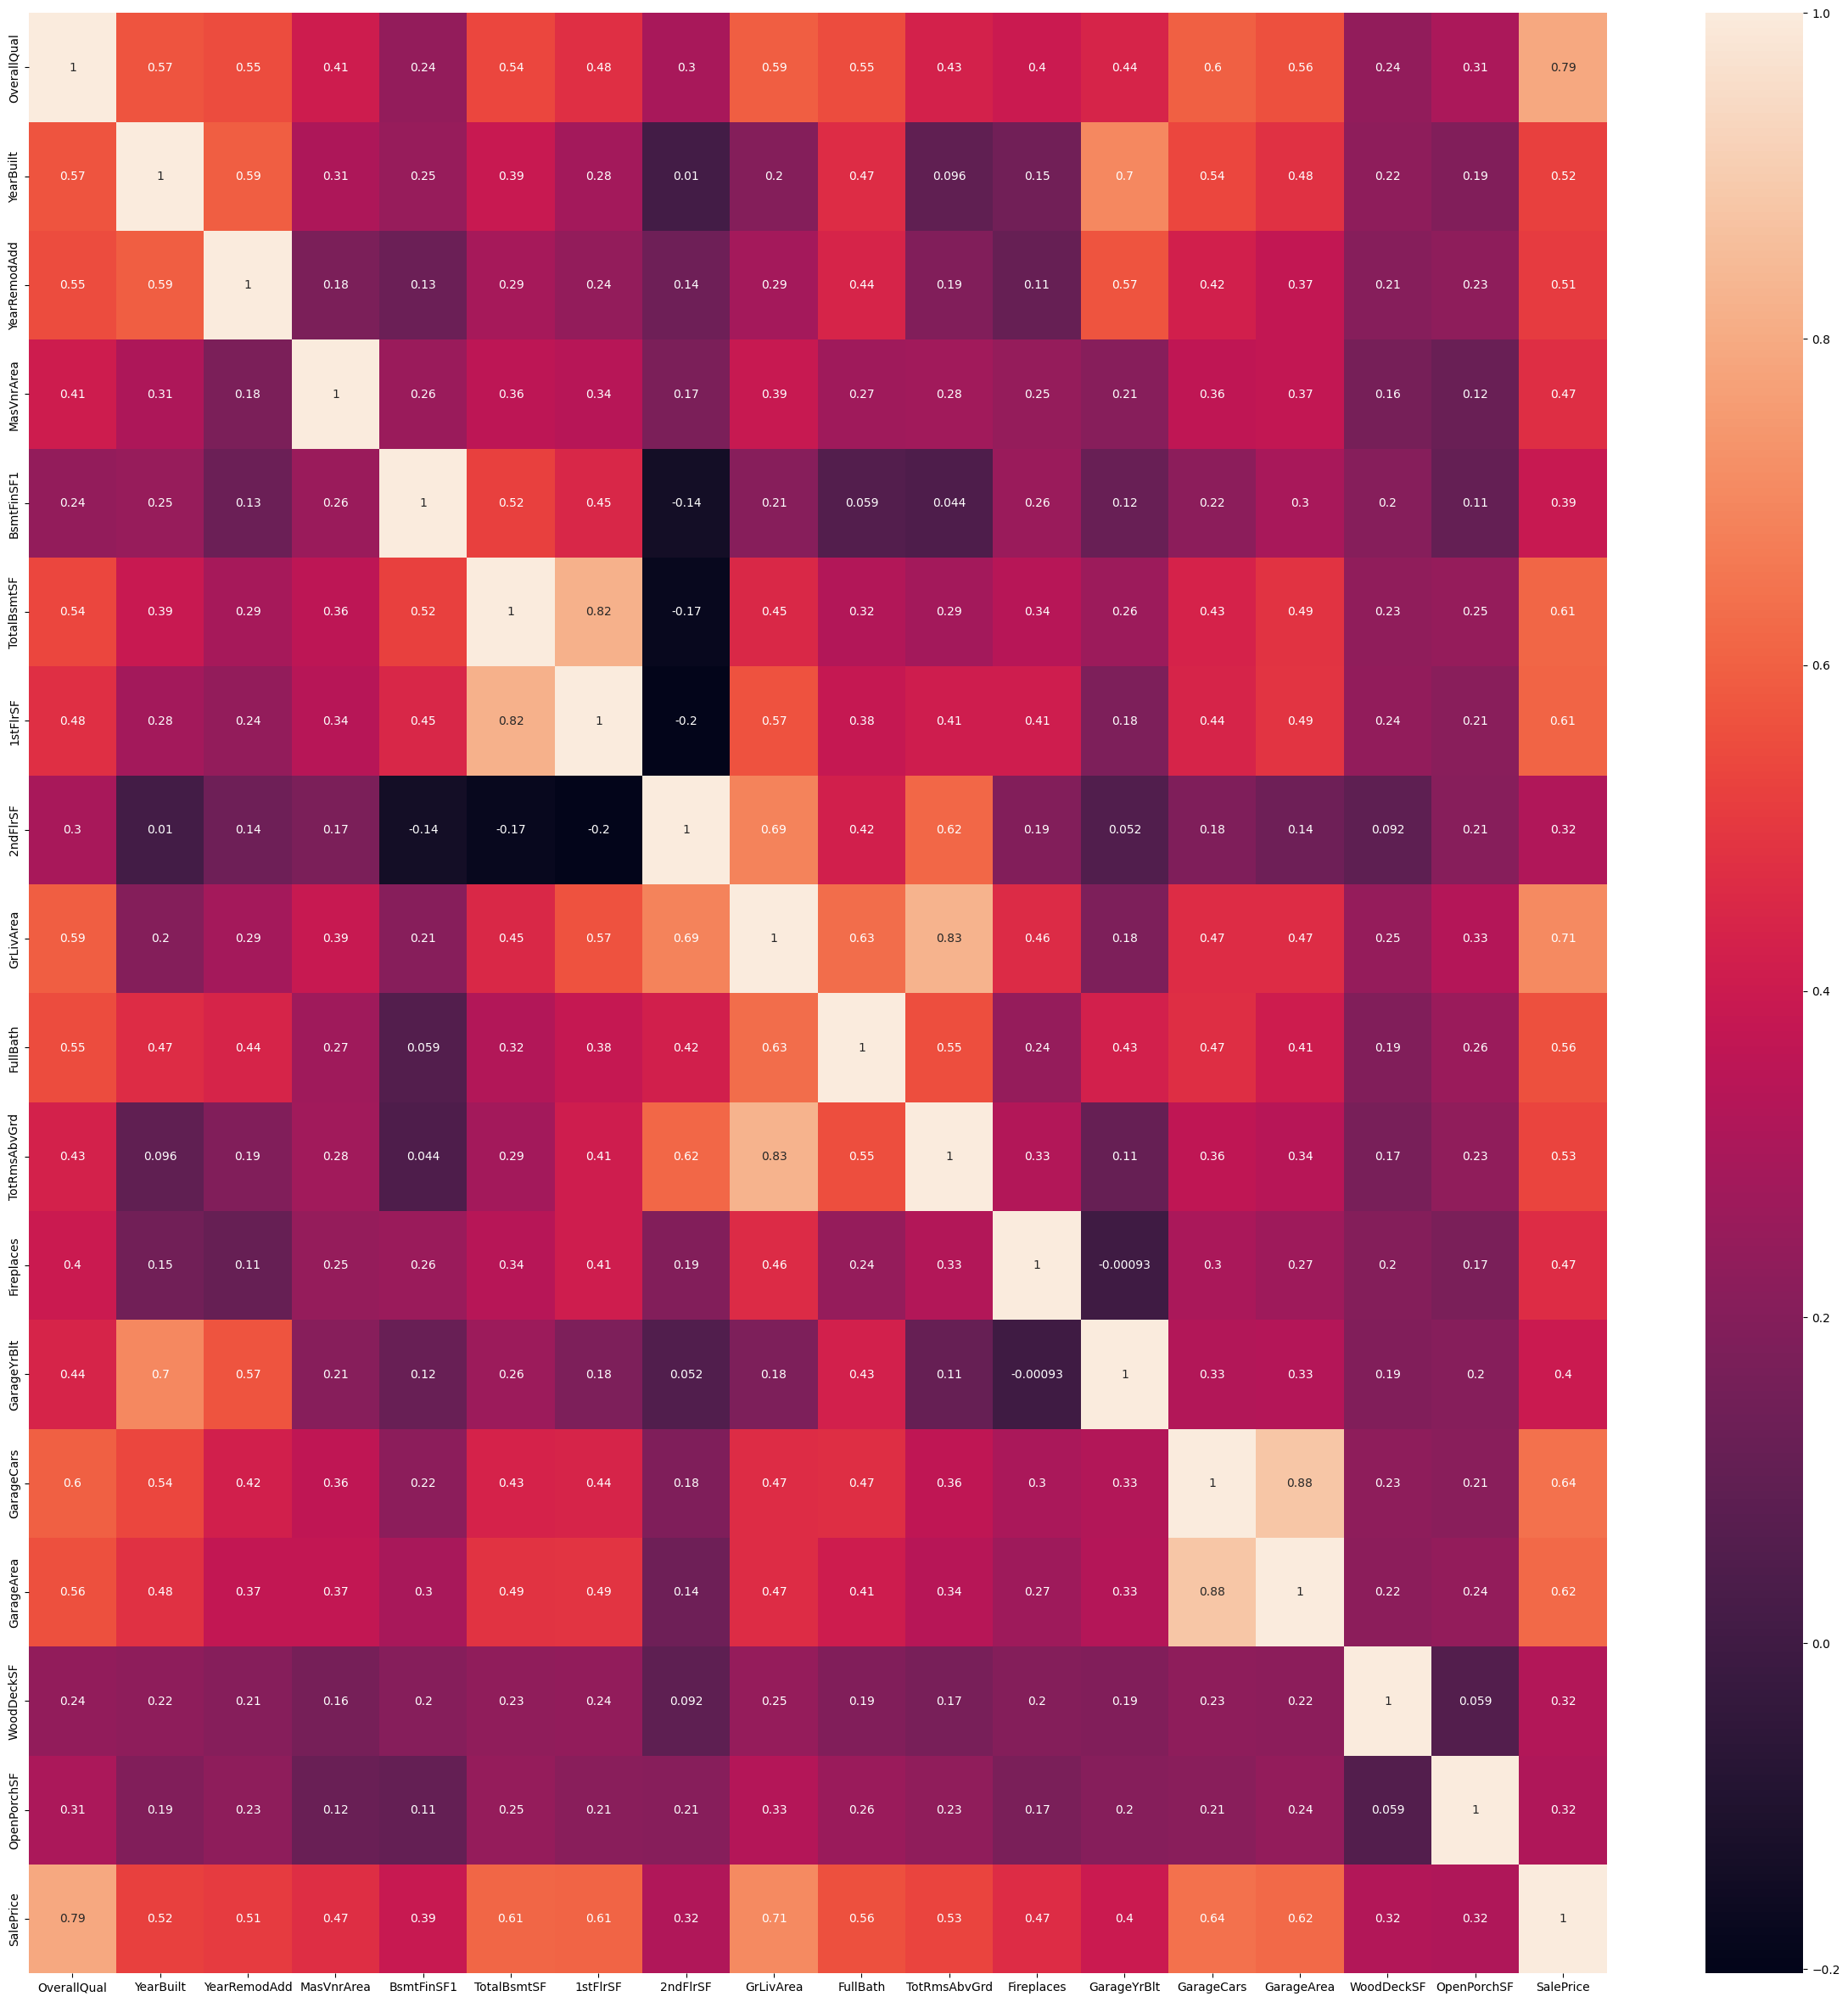

In [25]:
# Plotting the heatmap to check the correlation

plt.figure(figsize=(30,30))
corr = train.select_dtypes(include=[int,float]).corr()
sns.heatmap(corr, annot=True)
plt.show()

<p><b>Observation :</b> Some of the column in independent features are highly correlated to each other features so we need to remove that feature .</p>
<br>
<p><b>WHY ?</b></p>
<p>In machine learning and statistical modeling, removing highly correlated independent variables (features) is important because of multicollinearity : <b>Reasons</b></p>
<ul>
    <li><b>1. Multicollinearity Affects Model Stability :</b>When two or more independent variables are highly correlated, they contain redundant information. This makes it hard for the model to determine which feature is driving the prediction.</li>
    <li><b>2. Multicollinearity Increases Variance (Unstable Coefficients) :</b>Multicollinearity leads to unstable regression coefficients, meaning:
        <ul>
            <li>Small changes in data → Large swings in model predictions.</li>
            <li>Coefficients become unreliable (they may change signs or have extreme values).</li>
        </ul>
    </li>
    <li><b>Improves Model Performance & Interpretability :</b>
        <ul>
            <li>Removing highly correlated features reduces model complexity.</li>
            <li>Helps in understanding which features truly impact the target variable.</li>
            <li>Reduces computational cost in large datasets.</li>
        </ul>
    </li>
    <li><b>Prevents Overfitting</b>
        <ul>
            <li>Too many correlated features can make a model memorize training data instead of generalizing well.</li>
            <li>Removing redundant features makes the model more robust.</li>
        </ul>
    </li>
</ul>

In [26]:
# function to detect the columns which are highly correlated .

def highly_correlated_columns(corr_matrix, threshold):
    """
        Correlation Threshold (Pearsons) :
            1. ∣ r ∣ < 0.70 → ✅ No serious multicollinearity, features can be kept.
            2. ∣ r ∣ ≥ 0.70 → ⚠️ Possible multicollinearity, consider removing one of the variables.
            3. ∣ r ∣ ≥ 0.85 or 0.90 → 🚨 Severe multicollinearity, remove one of the features.
    """
    # Find pairs of highly correlated features
    high_corr_features = set()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                high_corr_features.add(colname)

    return high_corr_features

In [27]:
corr = train.drop(columns=['SalePrice']).select_dtypes(int,float).corr()
highly_correlated_feature = highly_correlated_columns(corr, 0.7)
print(f'The features that are highly correlated are {highly_correlated_feature}')

The features that are highly correlated are {'GarageArea', '1stFlrSF', 'TotRmsAbvGrd'}


In [28]:
print(f'before removing dataframe shape : {train.shape}')
train = train.drop(columns=highly_correlated_feature)
print("*-"*100)
print(f'before removing dataframe shape : {train.shape}')

before removing dataframe shape : (1460, 55)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
before removing dataframe shape : (1460, 52)


<h4><b>Correction between categorical varibale in independent feature and dependent variable</b></h4>
<p>Since categorical variables cannot be directly correlated using Pearson correlation (𝑟), you need statistical tests or encoding methods to check their relationship with SalePrice.</p>
<ul>
    <li>
        <p><b>1. Using ANOVA (Analysis of Variance)</b></p>
        <ul>
            <li>If SalePrice is continuous and the categorical column has multiple categories, use ANOVA to test if the means of SalePrice across categories are significantly different.</li>
            <li>p-value < 0.05 → The categorical column is significantly correlated with SalePrice.</li>
        </ul>
    </li>
    <li>
        <p><b>2. Using Cramér's V (For Categorical vs. Categorical)</b></p>
        <ul>
            <li>f SalePrice is binned into categories (e.g., High, Medium, Low), you can use Cramér's V to measure association.</li>
        </ul>
    </li>
    <li>
        <p><b>3. Using Mean Encoding + Pearson Correlation</b></p>
        <ul>
            <li>Replace each category with the mean SalePrice in that category and compute correlation.</li>
        </ul>
    </li>
</ul>

<img src='./images/corr_category.png' width='800' height="300"/>

In [29]:
print(f'There are total categorical columns are : {len(train.select_dtypes(include=["object"]).columns)}')


There are total categorical columns are : 37


In [30]:
categorical_columns = train.select_dtypes(include=['object']).columns

In [31]:
""" 
    since we are having the categorical col in independent features 
    and have continous values in dependent features due to this we will 
    use the mean encoding and pearson correlation
"""
def mean_pearson_correlation(dataset, dependent_x_col_name, independent_y_col_name):

    mean_encoded = dataset.groupby(dependent_x_col_name)[independent_y_col_name].mean().to_dict()
    new_col = dependent_x_col_name + "_encoded"
    dataset[new_col] = dataset[dependent_x_col_name].map(mean_encoded)

    # computing the relation 
    correlation = dataset[[new_col,independent_y_col_name]].corr().iloc[0,1]
    
    return correlation


def get_correlation_of_categorical_variable(dataframe : pd.DataFrame , cat_column : list) -> dict :
    data = {}

    for col_name in cat_column:
        output = mean_pearson_correlation(dataframe, col_name, 'SalePrice')
        data[col_name] = float(output)
    
    return data 


# Here Correlation > 0.3 → Significant 
#      Correlation < 0.3 → Weak correlation

In [32]:
# categorical_columns[0]
cat_correlation = get_correlation_of_categorical_variable(train, categorical_columns)
cat_correlation

{'MSZoning': 0.32796292998790166,
 'Street': 0.041035535500049375,
 'LotShape': 0.276361552192514,
 'LandContour': 0.1606053718320391,
 'Utilities': 0.014314296147250884,
 'LotConfig': 0.14498056607030027,
 'LandSlope': 0.05178441429881509,
 'Neighborhood': 0.7386304832658643,
 'Condition1': 0.18063953044536343,
 'Condition2': 0.0994945260628308,
 'BldgType': 0.18583333094140667,
 'HouseStyle': 0.29379010756719504,
 'RoofStyle': 0.24020122840683303,
 'RoofMatl': 0.1772374764084492,
 'Exterior1st': 0.39086202570996004,
 'Exterior2nd': 0.39221149922589377,
 'ExterQual': 0.6909325420958303,
 'ExterCond': 0.15368025465904533,
 'Foundation': 0.5063283534727427,
 'BsmtQual': 0.6784602986219047,
 'BsmtCond': 0.16622861136689357,
 'BsmtExposure': 0.36916281887806796,
 'BsmtFinType1': 0.44178020121086187,
 'BsmtFinType2': 0.09028696262010602,
 'Heating': 0.12015463131446823,
 'HeatingQC': 0.44215436879001185,
 'CentralAir': 0.2513281638401548,
 'Electrical': 0.24423540252173095,
 'KitchenQual':

In [33]:
# dropping the categorical columns having co-relation less than 30%
drop_column_list = []

for key, value in cat_correlation.items():
    if value < 0.3 :
        drop_column_list.append(key)

print(f"total categorical columns are {len(cat_correlation)} and having low corellation with salePrice are {len(drop_column_list)}")
print('Columns to drop')

for item in drop_column_list:
    print(item)

train = train.drop(columns=drop_column_list, axis=0)

total categorical columns are 37 and having low corellation with salePrice are 22
Columns to drop
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
ExterCond
BsmtCond
BsmtFinType2
Heating
CentralAir
Electrical
Functional
GarageQual
GarageCond
PavedDrive


<h3><b>Outlier Detection And Fixing Outliers :</b></h3>
<p>There are two different types of features in the data .</p>
<ul>
    <li>1. Numeric </li>
    <li>2. Catergorical</li>
</ul>

<h5><b>Handling outliers in the Numeric colums :</b></h5>

In [34]:
numeric_colums = train.select_dtypes(include=[int,float]).columns

new_df = pd.DataFrame(train[numeric_colums[0]], columns=[numeric_colums[0]])
new_df['z-score'] = (new_df[numeric_colums[0]] - new_df[numeric_colums[0]].mean()) / new_df[numeric_colums[0]].std()

# Finding outliers using the z-score and replace it with the mean 
mean = new_df[numeric_colums[0]].mean()
new_df.loc[new_df['z-score'] > 3 , numeric_colums[0]] = mean




C:\Users\Abhishek\AppData\Local\Temp\ipykernel_12304\2681277244.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.0993150684931505' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[new_df['z-score'] > 3 , numeric_colums[0]] = mean


In [35]:
def fix_outlier_numeric_column(dataset, column_name):
    """
        aim : taking the dataset and column name to fix we will upate the outlier with the mean value .
    """
    selected_column = pd.DataFrame(dataset[column_name], columns=[column_name])
    selected_column['z_score'] = (selected_column[column_name] - selected_column[column_name].mean())/ selected_column[column_name].std()
    
    # detect the outerlier using the z-score and fix the values mean
    mean = selected_column[column_name].mean()
    selected_column.loc[ selected_column['z_score'] > 3 , column_name] = mean

    # testing-code detect that any outlier still exist
    
    # selected_column = selected_column.drop(columns=['z_score'])
    # selected_column['z_score'] = (selected_column[column_name] - selected_column[column_name].mean())/ selected_column[column_name].std()
    # outliers = selected_column[ selected_column['z_score'] > 3]
    # print(outliers)

    
    dataset = dataset.drop(columns=[column_name])
    dataset[column_name] = selected_column[column_name]
    
    return dataset



In [36]:
copy_df = train
numeric_colums = copy_df.select_dtypes(include=[int,float]).columns

for column in numeric_colums :
    copy_df = fix_outlier_numeric_column(copy_df, column)

print(f'train_data shape : {train.shape} : after fixing outlier train data shape : {copy_df.shape}')
train = copy_df
del copy_df

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_12304\3810683933.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.0993150684931505' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  selected_column.loc[ selected_column['z_score'] > 3 , column_name] = mean
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_12304\3810683933.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1971.267808219178' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  selected_column.loc[ selected_column['z_score'] > 3 , column_name] = mean
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_12304\3810683933.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1984.8657534246574' has dtype incom

train_data shape : (1460, 67) : after fixing outlier train data shape : (1460, 67)


<h3><b>Outlier Detection in categorical column</b></h3>
<p>incase outlier detected in categorical column remove the entire column. </p>

In [37]:
def remove_outlier_column(dataset, column):
    selected_column = pd.DataFrame(dataset[column], columns=[column])
    category_count = selected_column[column].value_counts()
    # print(category_count)

    q1 =  category_count.quantile(0.25)
    q3 =  category_count.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - iqr * 1.5
    upper_bound = q3 + iqr * 1.5

    # print(f"q1 : {q1}, q3 : {q3}, iqr : {iqr}, lower_bound : {lower_bound}, upper_bound : {upper_bound}")
    # outlier_categories = category_counts[category_counts < lower_bound].index

    outlier_categories = category_count[category_count < lower_bound].index
    
    if len(outlier_categories) > 0 :
        dataset = dataset.drop(column=[column])
    
    return dataset


In [38]:

copy_df = train
categorical_columns = train.select_dtypes(include=['object']).columns

for column in categorical_columns :
    copy_df = remove_outlier_column(copy_df, column)

train = copy_df
del copy_df

train

,MSZoning,Neighborhood,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,...,Electrical_encoded,KitchenQual_encoded,Functional_encoded,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded
0,RL,CollgCr,VinylSd,VinylSd,Gd,PConc,Gd,No,GLQ,Ex,...,186810.637453,212116.023891,183429.147059,194411.473186,202068.869668,182591.864224,183017.189055,186433.973881,173401.836622,175202.219533
1,RL,Veenker,MetalSd,MetalSd,TA,CBlock,Gd,Gd,ALQ,Ex,...,186810.637453,139962.511565,183429.147059,194411.473186,202068.869668,182591.864224,183017.189055,186433.973881,173401.836622,175202.219533
2,RL,CollgCr,VinylSd,VinylSd,Gd,PConc,Gd,Mn,GLQ,Ex,...,186810.637453,212116.023891,183429.147059,194411.473186,202068.869668,182591.864224,183017.189055,186433.973881,173401.836622,175202.219533
3,RL,Crawfor,Wd Sdng,Wd Shng,TA,BrkTil,TA,No,ALQ,Gd,...,186810.637453,212116.023891,183429.147059,134091.162791,137570.460641,182591.864224,183017.189055,186433.973881,173401.836622,146526.623762
4,RL,NoRidge,VinylSd,VinylSd,Gd,PConc,Gd,Av,GLQ,Ex,...,186810.637453,212116.023891,183429.147059,194411.473186,202068.869668,182591.864224,183017.189055,186433.973881,173401.836622,175202.219533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Gilbert,VinylSd,VinylSd,TA,PConc,Gd,No,Unf,Ex,...,186810.637453,139962.511565,183429.147059,194411.473186,202068.869668,182591.864224,183017.189055,186433.973881,173401.836622,175202.219533
1456,RL,NWAmes,Plywood,Plywood,TA,CBlock,Gd,No,ALQ,TA,...,186810.637453,139962.511565,146385.483871,194411.473186,137570.460641,182591.864224,183017.189055,186433.973881,173401.836622,175202.219533
1457,RL,Crawfor,CemntBd,CmentBd,Ex,Stone,TA,No,GLQ,Ex,...,186810.637453,212116.023891,183429.147059,194411.473186,202068.869668,182591.864224,183017.189055,186433.973881,173401.836622,175202.219533
1458,RL,NAmes,MetalSd,MetalSd,TA,CBlock,TA,Mn,GLQ,Gd,...,122196.893617,212116.023891,183429.147059,194411.473186,137570.460641,182591.864224,183017.189055,186433.973881,173401.836622,175202.219533


In [39]:


# Function to calculate correlation ratio (eta squared)
def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = pd.to_numeric(values, errors='coerce')  # Ensure values are numeric

    # Check if there is no variation in values (same value for all)
    if np.all(np.isnan(values)) or np.all(values == values[0]):
        return 0  # If no variation, correlation is 0 (or return NaN if desired)

    mean_overall = values.mean()
    ss_total = ((values - mean_overall) ** 2).sum()
    ss_between = sum(len(values[categories == category]) * (values[categories == category].mean() - mean_overall) ** 2 
                     for category in np.unique(categories))
    
    return np.sqrt(ss_between / ss_total)

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Function to create a comprehensive correlation matrix
def comprehensive_corr_matrix(df):
    corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
    
    # Initialize LabelEncoder for categorical data
    le = LabelEncoder()
    
    # Loop through each combination of columns
    for col1, col2 in combinations(df.columns, 2):
        # Convert columns to numeric if necessary
        if pd.api.types.is_numeric_dtype(df[col1]):
            df[col1] = pd.to_numeric(df[col1], errors='coerce')
        if pd.api.types.is_numeric_dtype(df[col2]):
            df[col2] = pd.to_numeric(df[col2], errors='coerce')

        # Numerical to Numerical
        if pd.api.types.is_numeric_dtype(df[col1]) and pd.api.types.is_numeric_dtype(df[col2]):
            corr = df[col1].corr(df[col2])
        elif pd.api.types.is_categorical_dtype(df[col1]) and pd.api.types.is_categorical_dtype(df[col2]):
            # Categorical to Categorical
            corr = cramers_v(df[col1], df[col2])
        else:
            # Categorical to Numerical
            if pd.api.types.is_categorical_dtype(df[col1]):
                # Encode categorical column to numeric values
                df[col1] = le.fit_transform(df[col1])
                corr = correlation_ratio(df[col1], df[col2])
            else:
                # Encode categorical column to numeric values
                df[col2] = le.fit_transform(df[col2])
                corr = correlation_ratio(df[col2], df[col1])
        
        # If correlation results in NaN, set it to 0 or another default value
        if np.isnan(corr):
            corr = 0  # You can choose to set it as NaN if needed
        
        corr_matrix.loc[col1, col2] = corr
        corr_matrix.loc[col2, col1] = corr
    
    return corr_matrix

# Get the correlation matrix
corr_matrix = comprehensive_corr_matrix(train.copy())
corr_matrix =  corr_matrix.fillna(0)
print(corr_matrix.shape)


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_12304\2192069600.py:44: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col1]) and pd.api.types.is_categorical_dtype(df[col2]):
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_12304\2192069600.py:49: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col1]):
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_12304\2192069600.py:44: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col1]) and pd.api.types.is_categorical_dtype(df[col2]):
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_12304\2192069600.py:49: DeprecationWarning: is_ca

(67, 67)


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_12304\2192069600.py:69: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr_matrix =  corr_matrix.fillna(0)


In [40]:
# removing the columns having less than 30% correlation with respect to data  .
corr_matrix = corr_matrix.loc[(abs(corr_matrix['SalePrice']) > 0.30) | (corr_matrix.index == 'SalePrice'), :]
corr_matrix = corr_matrix[corr_matrix.index]

In [41]:
# removing the col with hight co-rellation metrix 

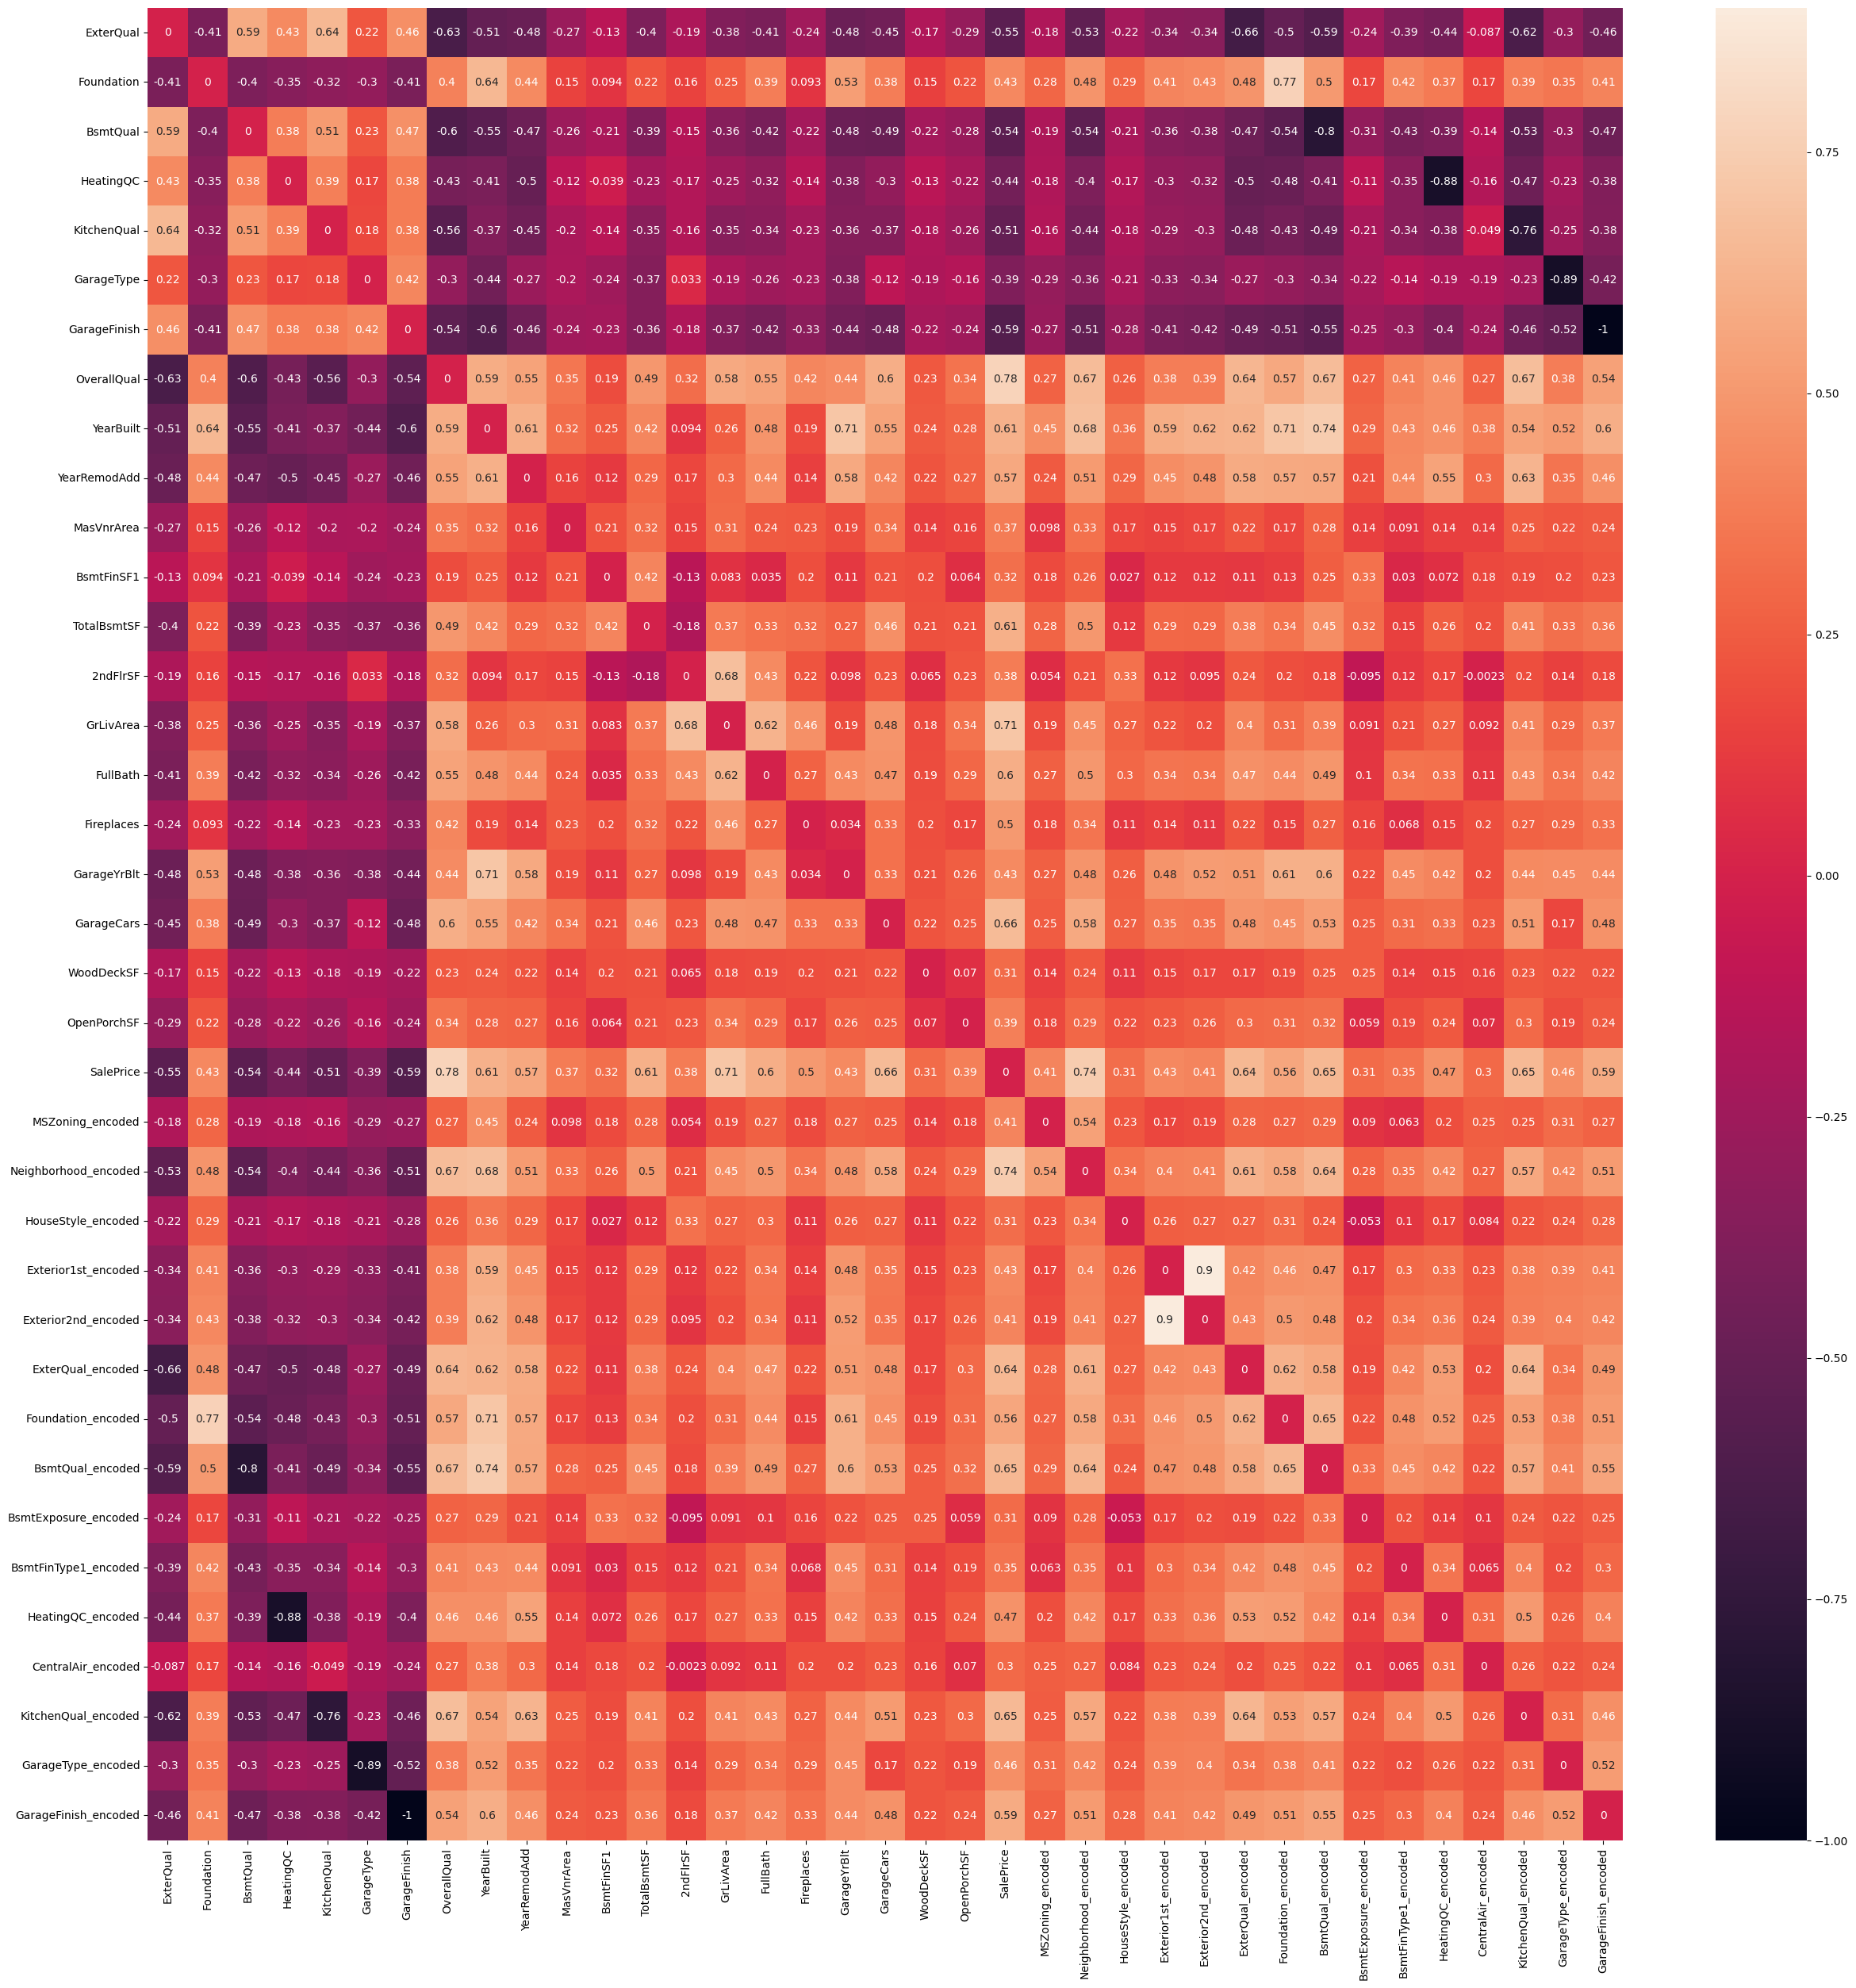

In [42]:
plt.figure(figsize=(30,30))

sns.heatmap(corr_matrix, annot=True)
plt.show()

In [43]:
# removing SalePrice from both rows and column

corr_matrix = corr_matrix.drop(columns=["SalePrice"])
corr_matrix = corr_matrix[corr_matrix.index != 'SalePrice']
corr_matrix

,ExterQual,Foundation,BsmtQual,HeatingQC,KitchenQual,GarageType,GarageFinish,OverallQual,YearBuilt,YearRemodAdd,...,ExterQual_encoded,Foundation_encoded,BsmtQual_encoded,BsmtExposure_encoded,BsmtFinType1_encoded,HeatingQC_encoded,CentralAir_encoded,KitchenQual_encoded,GarageType_encoded,GarageFinish_encoded
ExterQual,0.000000,-0.413563,0.587482,0.432499,0.641584,0.224433,0.455870,-0.634319,-0.507856,-0.482496,...,-0.663271,-0.504143,-0.588830,-0.236713,-0.387162,-0.435830,-0.086965,-0.622209,-0.301997,-0.455870
Foundation,-0.413563,0.000000,-0.396413,-0.348917,-0.318528,-0.299517,-0.409578,0.396186,0.641484,0.438643,...,0.480807,0.768712,0.504886,0.170818,0.420704,0.367775,0.167949,0.387027,0.350614,0.409578
BsmtQual,0.587482,-0.396413,0.000000,0.383216,0.509075,0.230133,0.468205,-0.600561,-0.550997,-0.469273,...,-0.468763,-0.544381,-0.795208,-0.305471,-0.426820,-0.392806,-0.139415,-0.527061,-0.301203,-0.468205
HeatingQC,0.432499,-0.348917,0.383216,0.000000,0.388233,0.165755,0.379143,-0.425944,-0.410435,-0.495664,...,-0.502794,-0.480721,-0.411492,-0.110624,-0.346501,-0.880892,-0.164256,-0.471419,-0.233056,-0.379143
KitchenQual,0.641584,-0.318528,0.509075,0.388233,0.000000,0.179082,0.375808,-0.555348,-0.372252,-0.452431,...,-0.475476,-0.429566,-0.486159,-0.210122,-0.343184,-0.377766,-0.049277,-0.764694,-0.253051,-0.375808
GarageType,0.224433,-0.299517,0.230133,0.165755,0.179082,0.000000,0.421422,-0.297995,-0.443566,-0.271764,...,-0.269295,-0.301799,-0.336454,-0.218686,-0.139409,-0.186366,-0.189765,-0.228563,-0.890487,-0.421422
GarageFinish,0.455870,-0.409578,0.468205,0.379143,0.375808,0.421422,0.000000,-0.538529,-0.596926,-0.456786,...,-0.488423,-0.508321,-0.551244,-0.249559,-0.296963,-0.395512,-0.240439,-0.461572,-0.516793,-1.000000
OverallQual,-0.634319,0.396186,-0.600561,-0.425944,-0.555348,-0.297995,-0.538529,0.000000,0.589415,0.550684,...,0.636799,0.568969,0.667345,0.273214,0.407441,0.457083,0.272038,0.673331,0.381489,0.538529
YearBuilt,-0.507856,0.641484,-0.550997,-0.410435,-0.372252,-0.443566,-0.596926,0.589415,0.000000,0.608860,...,0.618595,0.707799,0.736635,0.288064,0.430705,0.459616,0.377291,0.543582,0.516294,0.596926
YearRemodAdd,-0.482496,0.438643,-0.469273,-0.495664,-0.452431,-0.271764,-0.456786,0.550684,0.608860,0.000000,...,0.581048,0.573979,0.570378,0.207239,0.437690,0.550017,0.298878,0.625316,0.347091,0.456786


In [44]:
feature_list = highly_correlated_columns(corr_matrix, 0.7) # < return the column that are highly corrlated
feature_list

{'BsmtQual_encoded',
 'Exterior2nd_encoded',
 'Foundation_encoded',
 'GarageFinish_encoded',
 'GarageType_encoded',
 'GarageYrBlt',
 'HeatingQC_encoded',
 'KitchenQual_encoded'}

In [45]:
corr_matrix = corr_matrix.drop(columns=feature_list)
corr_matrix = corr_matrix.drop(feature_list, axis=0, errors='ignore')



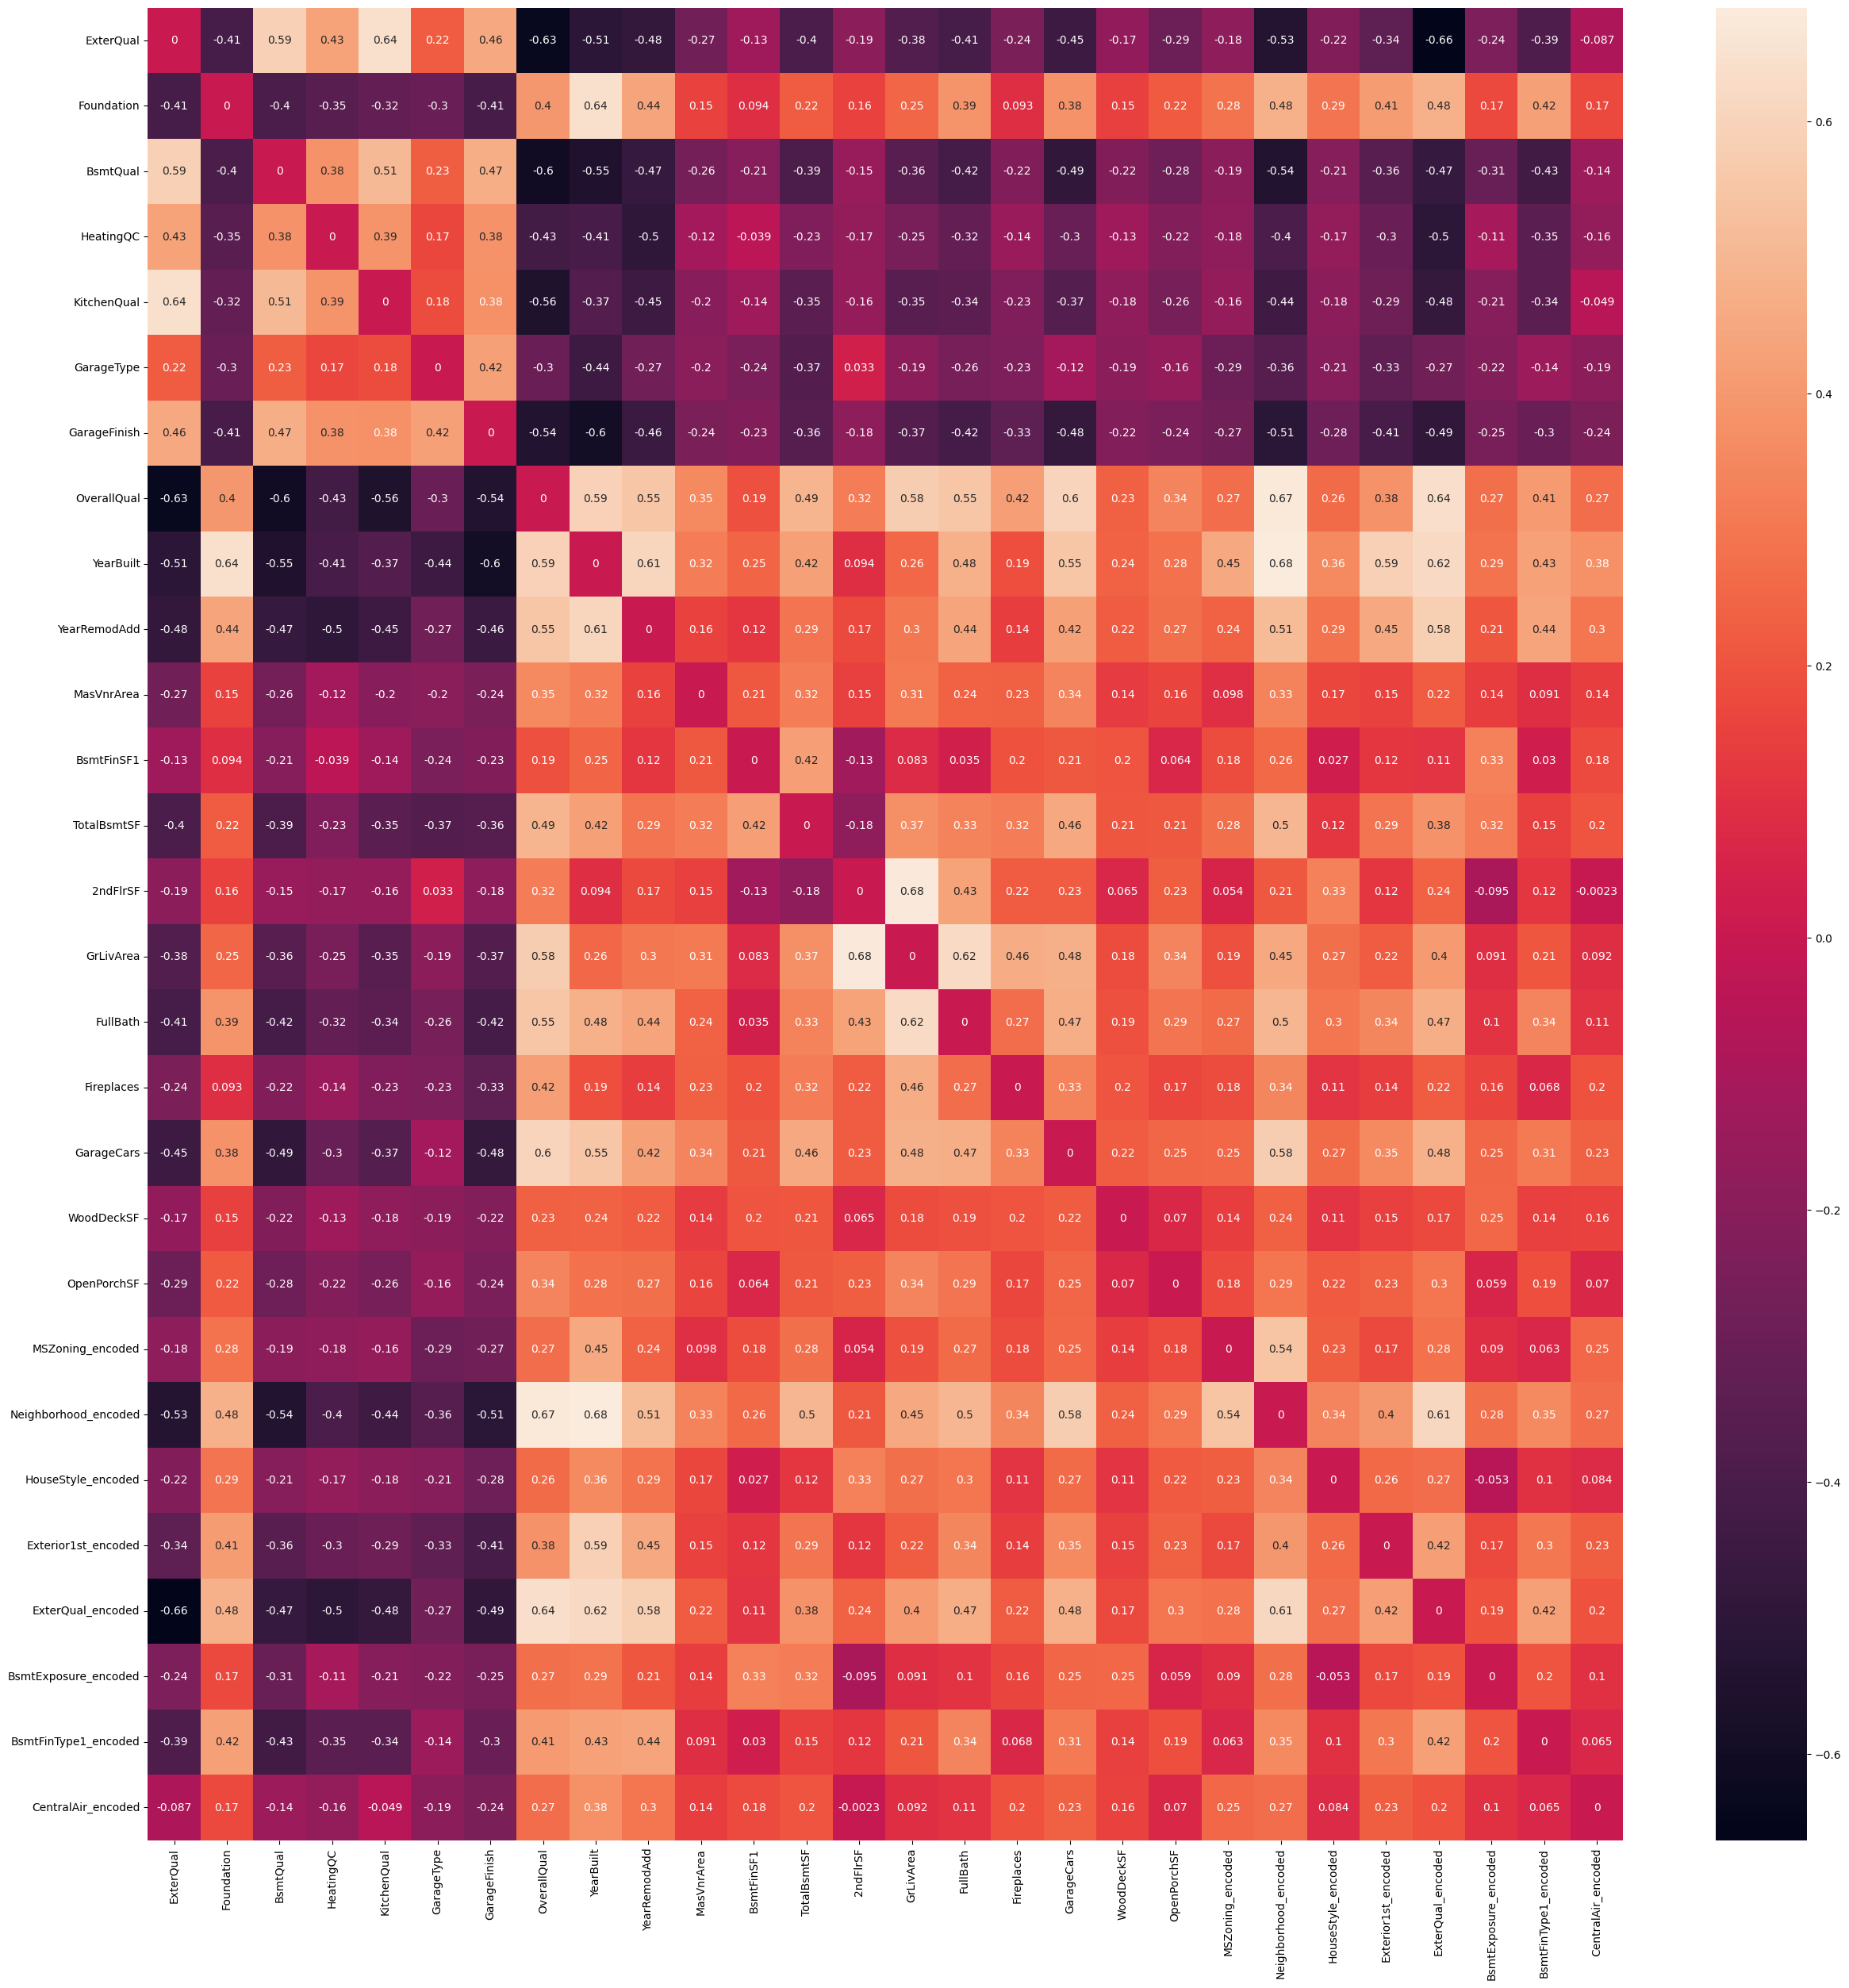

In [46]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [47]:
# extract the required features 

final_required_columns = list(corr_matrix.columns)
final_required_columns.append("SalePrice")



In [48]:
train = train[final_required_columns]
train.shape

(1460, 29)

In [49]:
train.to_csv("clean_and_required.csv")

# Implement machine learning algorithms

In [50]:
train

,ExterQual,Foundation,BsmtQual,HeatingQC,KitchenQual,GarageType,GarageFinish,OverallQual,YearBuilt,YearRemodAdd,...,OpenPorchSF,MSZoning_encoded,Neighborhood_encoded,HouseStyle_encoded,Exterior1st_encoded,ExterQual_encoded,BsmtExposure_encoded,BsmtFinType1_encoded,CentralAir_encoded,SalePrice
0,Gd,PConc,Gd,Ex,Gd,Attchd,RFn,7.0,2003.0,2003.0,...,61.0,191004.994787,197965.773333,210051.764045,213732.900971,231633.510246,163439.248234,235413.720096,186186.70989,208500.0
1,TA,CBlock,Gd,Ex,TA,Attchd,RFn,6.0,1976.0,1976.0,...,0.0,191004.994787,238772.727273,175985.477961,149422.177273,144341.313466,257689.805970,161573.068182,186186.70989,181500.0
2,Gd,PConc,Gd,Ex,Gd,Attchd,RFn,7.0,2001.0,2002.0,...,42.0,191004.994787,197965.773333,210051.764045,213732.900971,231633.510246,192789.657895,235413.720096,186186.70989,223500.0
3,TA,BrkTil,TA,Gd,Gd,Detchd,Unf,7.0,1915.0,1970.0,...,35.0,191004.994787,210624.725490,210051.764045,149841.645631,144341.313466,163439.248234,161573.068182,186186.70989,140000.0
4,Gd,PConc,Gd,Ex,Gd,Attchd,RFn,8.0,2000.0,2000.0,...,84.0,191004.994787,335295.317073,210051.764045,213732.900971,231633.510246,206643.420814,235413.720096,186186.70989,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,PConc,Gd,Ex,TA,Attchd,RFn,6.0,1999.0,2000.0,...,40.0,191004.994787,192854.506329,210051.764045,213732.900971,144341.313466,163439.248234,165519.282655,186186.70989,175000.0
1456,TA,CBlock,Gd,TA,TA,Attchd,Unf,6.0,1978.0,1988.0,...,0.0,191004.994787,189050.068493,175985.477961,175942.379630,144341.313466,163439.248234,161573.068182,186186.70989,210000.0
1457,Ex,Stone,TA,Ex,Gd,Attchd,RFn,7.0,1941.0,2006.0,...,60.0,191004.994787,210624.725490,210051.764045,231690.655738,180921.195890,163439.248234,235413.720096,186186.70989,266500.0
1458,TA,CBlock,TA,Gd,Gd,Attchd,Unf,5.0,1950.0,1996.0,...,0.0,191004.994787,145847.080000,175985.477961,149422.177273,144341.313466,192789.657895,235413.720096,186186.70989,142125.0


In [51]:
copy_df = train.copy()
copy_df['SalePrice'] = np.log(copy_df['SalePrice']) # Natural log to fix the right skewed data



<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_12304\374618399.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.hist(copy_df['SalePrice'], bins=100, label='Sales dist. ($\mu$={:.2f} and $\sigma$={:.2f})'.format(mean, sigma), density=True) #  <-- plotting hisplot
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_12304\374618399.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, p, 'r--', color='red', label='normal distribution') # <-- plotting graph


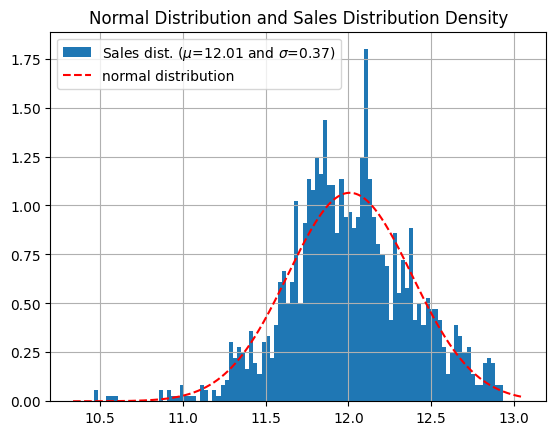

In [52]:
(mean, sigma) = norm.fit(copy_df['SalePrice']) # <-- computing mean, sigma

plt.hist(copy_df['SalePrice'], bins=100, label='Sales dist. ($\mu$={:.2f} and $\sigma$={:.2f})'.format(mean, sigma), density=True) #  <-- plotting hisplot 

x_min, x_max = plt.xlim() # <-- xlims function gives the current max and min value from the graph 
x = np.linspace(x_min, x_max, 1000) # <-- np.linespace generates the evenly spaces point between x_min, x_max
p = norm.pdf(x, mean, sigma) # <-- generates the pdf function for the normal distribution 

plt.plot(x, p, 'r--', color='red', label='normal distribution') # <-- plotting graph 
plt.legend() # <-- adding legends to the graph
plt.title("Normal Distribution and Sales Distribution Density") # <-- adding the title 
plt.grid(True) # <-- adding grid to the graph 
plt.show() # <-- plot the graphs 


In [53]:
copy_df = train
copy_df["SalePrice"] = np.sqrt(copy_df['SalePrice']) # Use Square Root Transformation (Milder than Log)

""" 
    why after log transformation the data is getting left skewed ?
    --> If applying the natural log (np.log()) makes your data left-skewed, it means that
      the transformation was too strong. Instead of np.log(), you can try milder transformations that reduce skewness but don’t make it negative.
    
      other way to fix this kind of problem :
        1. Use Square Root Transformation (Milder than Log)
        2. Use Cube Root Transformation (More flexible)
        3. Use Box-Cox Transformation (Best for Positive Values)
        4. Use Yeo-Johnson Transformation (For Positive & Negative Values)
        
"""

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_12304\596413435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_df["SalePrice"] = np.sqrt(copy_df['SalePrice']) # Use Square Root Transformation (Milder than Log)


' \n    why after log transformation the data is getting left skewed ?\n    --> If applying the natural log (np.log()) makes your data left-skewed, it means that\n      the transformation was too strong. Instead of np.log(), you can try milder transformations that reduce skewness but don’t make it negative.\n    \n      other way to fix this kind of problem :\n        1. Use Square Root Transformation (Milder than Log)\n        2. Use Cube Root Transformation (More flexible)\n        3. Use Box-Cox Transformation (Best for Positive Values)\n        4. Use Yeo-Johnson Transformation (For Positive & Negative Values)\n        \n'

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_12304\374618399.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.hist(copy_df['SalePrice'], bins=100, label='Sales dist. ($\mu$={:.2f} and $\sigma$={:.2f})'.format(mean, sigma), density=True) #  <-- plotting hisplot
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_12304\374618399.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, p, 'r--', color='red', label='normal distribution') # <-- plotting graph


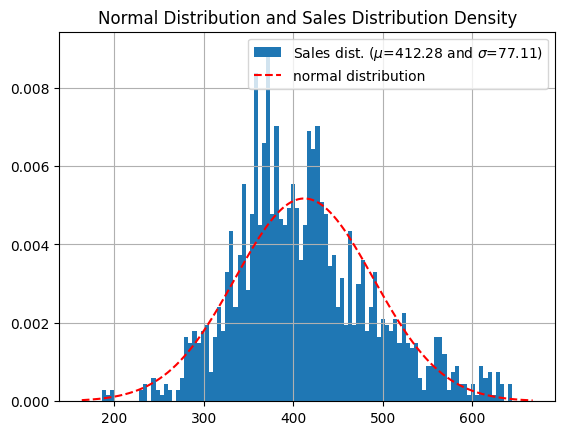

In [54]:
(mean, sigma) = norm.fit(copy_df['SalePrice']) # <-- computing mean, sigma

plt.hist(copy_df['SalePrice'], bins=100, label='Sales dist. ($\mu$={:.2f} and $\sigma$={:.2f})'.format(mean, sigma), density=True) #  <-- plotting hisplot 

x_min, x_max = plt.xlim() # <-- xlims function gives the current max and min value from the graph 
x = np.linspace(x_min, x_max, 1000) # <-- np.linespace generates the evenly spaces point between x_min, x_max
p = norm.pdf(x, mean, sigma) # <-- generates the pdf function for the normal distribution 

plt.plot(x, p, 'r--', color='red', label='normal distribution') # <-- plotting graph 
plt.legend() # <-- adding legends to the graph
plt.title("Normal Distribution and Sales Distribution Density") # <-- adding the title 
plt.grid(True) # <-- adding grid to the graph 
plt.show() # <-- plot the graphs 


In [55]:
# Now everything is seeems fine so updateing the SalePrice in train_data
train = copy_df 
del copy_df

In [56]:
y = train['SalePrice']
x = train.drop(columns=['SalePrice'])

In [57]:
categorical_columns = x.select_dtypes(include=['object']).columns
numeric_colums = x.select_dtypes(include=[int, float]).columns

In [58]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(drop='first', sparse=False)  # Drop first to avoid multicollinearity
# encoded_cats = ohe.fit_transform(df[categorical_cols])

# # Convert to DataFrame
# import pandas as pd
# encoded_cat_df = pd.DataFrame(encoded_cats, columns=ohe.get_feature_names_out(categorical_cols))

# # Drop original categorical columns & merge new encoded features
# df = df.drop(columns=categorical_cols).reset_index(drop=True)
# df = pd.concat([df, encoded_cat_df], axis=1)

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False) # drop first to avoid the multip-colinarity
encoded_cat = ohe.fit_transform(x[categorical_columns])

# convert data to dataframe
encoded_cats_df = pd.DataFrame(encoded_cat, columns=ohe.get_feature_names_out(categorical_columns))

# drop original categorical column & merge new encoded features
x = x.drop(columns=categorical_columns).reset_index(drop=True)
x = pd.concat([x, encoded_cats_df], axis=1)
x

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,Fireplaces,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf
0,7.0,2003.0,2003.0,196.0,706.0,856.0,854.0,1710.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6.0,1976.0,1976.0,0.0,978.0,1262.0,0.0,1262.0,2.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7.0,2001.0,2002.0,162.0,486.0,920.0,866.0,1786.0,2.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7.0,1915.0,1970.0,0.0,216.0,756.0,756.0,1717.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,8.0,2000.0,2000.0,350.0,655.0,1145.0,1053.0,2198.0,2.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6.0,1999.0,2000.0,0.0,0.0,953.0,694.0,1647.0,2.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,6.0,1978.0,1988.0,119.0,790.0,1542.0,0.0,2073.0,2.0,2.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,7.0,1941.0,2006.0,0.0,275.0,1152.0,1152.0,2340.0,2.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,5.0,1950.0,1996.0,0.0,49.0,1078.0,0.0,1078.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
# standarizing the numerical features
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x[numeric_colums] = scale.fit_transform(x[numeric_colums])


In [60]:
x

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,Fireplaces,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf
0,0.651479,1.050994,0.878668,0.801637,0.639541,-0.474943,1.192216,0.467623,0.789741,-0.961480,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.071836,0.156734,-0.429577,-0.633039,1.280315,0.554316,-0.799363,-0.491590,0.789741,0.628166,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.651479,0.984752,0.830215,0.552765,0.121268,-0.312695,1.220201,0.630347,0.789741,0.628166,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.651479,-1.863632,-0.720298,-0.633039,-0.514794,-0.728455,0.963675,0.482611,-1.026041,0.628166,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.374795,0.951632,0.733308,1.928882,0.519396,0.257707,1.656296,1.512481,0.789741,0.628166,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.918511,0.733308,-0.633039,-1.023643,-0.229036,0.819087,0.332734,0.789741,0.628166,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,-0.071836,0.222975,0.151865,0.238014,0.837427,1.264149,-0.799363,1.244843,0.789741,2.217811,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,0.651479,-1.002492,1.024029,-0.633039,-0.375802,0.275452,1.887170,1.816517,0.789741,2.217811,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,-0.795151,-0.704406,0.539493,-0.633039,-0.908210,0.087854,-0.799363,-0.885553,-1.026041,-0.961480,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f' {x_train.shape} {y_train.shape} {x_test.shape} {y_test.shape}')

 (1168, 46) (1168,) (292, 46) (292,)


# Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
model = lr.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 1146.415105888459
R-squared Score: 0.8182801098162302


# Ridge Regression

<p>with different value of alpha . </p>

In [62]:
from sklearn.linear_model import Ridge

result_matrix = []

i = 0.0001

while i != 10 :
    # Create Ridge Regression model (using alpha = 1)
    ridge_model = Ridge(alpha=0.001)

    # Train the model
    ridge_model.fit(x_train, y_train)

    # Make predictions
    ridge_pred = ridge_model.predict(x_test)

    # Evaluate model
    ridge_mse = mean_squared_error(y_test, ridge_pred)

    # Output results
    # print(f'Ridge Regression Coefficients: {ridge_model.coef_}') # difference between actual value and predicted value
    # print(f'Ridge Regression Intercept: {ridge_model.intercept_}') # is x is 0 what is the value of y 
    # print(f'Ridge Regression Mean Squared Error: {ridge_mse}') 

    r2 = r2_score(y_test, ridge_pred)
    # print("R-squared Score:", r2)

    result_matrix.append([i, round(r2, 2)])
    i *= 10

# print(result_matrix)

In [63]:
for i in result_matrix :
    print(i)

[0.0001, 0.82]
[0.001, 0.82]
[0.01, 0.82]
[0.1, 0.82]
[1.0, 0.82]


# Lasso Regression 

In [64]:
from sklearn.linear_model import Lasso
# Create Lasso Regression model (using alpha = 0.1)

result_matrix = []
i = 0.0001
while i < 100 :

    lasso_model = Lasso(alpha=0.1)

    # Train the model
    lasso_model.fit(x_train, y_train)

    # Make predictions
    lasso_pred = lasso_model.predict(x_test)

    # Evaluate model
    lasso_mse = mean_squared_error(y_test, lasso_pred)


    # Output results
    # print(f'Lasso Regression Coefficients: {lasso_model.coef_}')
    # print(f'Lasso Regression Intercept: {lasso_model.intercept_}')
    # print(f'Lasso Regression Mean Squared Error: {lasso_mse}')

    r2 = r2_score(y_test , lasso_pred )
    # print("R-squared Score:", r2)
    result_matrix.append([i, round(r2, 2)])
    i *= 10

for i in result_matrix :
    print(i)

[0.0001, 0.82]
[0.001, 0.82]
[0.01, 0.82]
[0.1, 0.82]
[1.0, 0.82]
[10.0, 0.82]


# Supper Vector Machine 

<p>Hyper parameter in SVR</p>
<ul>
    <li><p>1. Regularization Parameter :</p>
        <ul>
            <li>High Value of C . (low bias and high variance)</li>
            <li>Low Value of C . (high bias and low variance)</li>
            <li>min val : 0.001, max val : 1000 , best val : 1</li>
        </ul>
    </li>
    <li><p>Epsilon :</p>
        <ul>
            <li>Smaller value : More sensitive to errors</li>
            <li>large value : Generatlised by more sensitive to erros.</li>
            <li>min val : 0.001, max_val : 1.0 , default val : 0.1 </li>
        </ul>
    </li>
    <li>
        <p>kernal type : </p>
        <ul>
            <li>Linear : best for high dimensional data .</li>
            <li>RBF : Default choice for non linear data .</li>
            <li>Polynomial : used when data has polynomial relationship .</li>
            <li>Sigmod : commenly used in the making the nueral networks .</li>
        </ul>
    </li>
    <li>
        <p>Gamma : </p>
        <ul>
            <li>Low Gamma : Model consider for far away point .</li>
            <li>high Gamma : model focus on near points</li>
            <li>Deafault : 1/ len(features)</li>
            <li>min : 1/1000000, max : 1000, dafault : 1/len(feature)</li>
        </ul>
    </li>
</ul>

In [65]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Different kernel functions
#     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
#     'epsilon': [0.001, 0.01, 0.1, 0.5, 1.0],  # Insensitive loss margin
#     'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],  # Kernel coefficient for RBF/poly/sigmoid
#     'degree': [2, 3, 4, 5]  # Degree for polynomial kernel
# }

param_grid = {
    'kernel': ['linear', 'rbf'],  # Different kernel functions
    'C': [ 0.1, 1, 10],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5],  # Insensitive loss margin
    'gamma': [0.001, 0.1],  # Kernel coefficient for RBF/poly/sigmoid
    'degree': [2, 3]  # Degree for polynomial kernel
}

# Perform Grid Search
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best Hyperparameters
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)




Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 1, 'degree': 2, 'epsilon': 0.5, 'gamma': 0.001, 'kernel': 'linear'}
Best MSE: 1055.887650827124


In [66]:
# Define the model
model = SVR(kernel='linear', C=1, epsilon=0.5, gamma=0.001)

# Train the model (you must fit before predicting)
model.fit(x_train, y_train)  # Ensure X_train and y_train are defined

# Predict on test data
y_pred = model.predict(x_test)

# Correct r2_score calculation
r2 = r2_score(y_test, y_pred)  # Corrected order: (y_true, y_pred)

print(f'Best score among all the scores: {r2}')

Best score among all the scores: 0.7943714136865601


# Decision Tree

<img src='images/Screenshot 2025-02-04 220024.png'></img>
<img src='images/Screenshot 2025-02-04 220753.png'></img>

In [67]:
from sklearn.tree import DecisionTreeRegressor

# # Define Hyperparameter Grid
# param_grid = {
#     'criterion': ['squared_error', 'absolute_error', 'poisson'],  # Splitting function
#     'max_depth': [3, 5, 10, None],  # Maximum depth
#     'min_samples_split': [2, 5, 10],  # Min samples to split
#     'min_samples_leaf': [1, 2, 5, 10],  # Min samples in leaf
#     'max_features': [None, 'sqrt', 'log2'],  # Features to consider
#     'splitter': ['best', 'random']  # Split strategy
# }

param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'poisson'],  # Splitting function
    'max_depth': [3, 5, 10, None],  # Maximum depth
    'min_samples_split': [2, 5, 10],  # Min samples to split
    'min_samples_leaf': [1, 2, 5, 10],  # Min samples in leaf
    'max_features': [None, 'sqrt', 'log2'],  # Features to consider
    'splitter': ['best', 'random']  # Split strategy
}

# Perform Grid Search
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Evaluate Best Model
model = grid_search.best_estimator_
print(f'best params : {grid_search.best_params_}')
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Performance Score", r2)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
best params : {'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}
Performance Score 0.7551208307787404


# Random Forest Regression
<img src='images/rf1.png'>
<img src='images/rf2.png'>
<img src='images/rf3.png'>

In [68]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 5], 
    'bootstrap': [True,False]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print best parameters and best MSE
print("Best Parameters:", grid_search.best_params_)
print("R2 Score:", r2_score(y_pred, y_test))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R2 Score: 0.697826879459603


# kNN regresion
<img src='images/knn1.png'>
<img src='images/knn2.png'>
<img src='images/knn3.png'>
<img src='images/knn5.png'>


In [69]:
from sklearn.neighbors import KNeighborsRegressor

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'n_jobs': [-1]
}

# Initialize KNN Regressor
knn = KNeighborsRegressor()

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best model from grid search
best_knn_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_knn_model.predict(x_test)
r2 = r2_score(y_pred, y_test)
print(f'Performace : {r2}')


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Hyperparameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Performace : 0.7651835962510628


# Xgboost Regressor
<img src='images/xgboost.png'>
<img src='images/xg2.png'>
<img src='images/xg3.png' />

In [74]:
# ! pip install scikit-learn xgboost catboost

import os
import sys
from dataclasses import dataclass

from catboost import CatBoostRegressor
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

def evaluate_models(X_train, y_train,X_test,y_test,models,param):
    # try:
    report = {}

    for i in range(len(list(models))):
        model = list(models.values())[i]
        para=param[list(models.keys())[i]]

        gs = GridSearchCV(model,para,cv=3)
        gs.fit(X_train,y_train)

        model.set_params(**gs.best_params_)
        model.fit(X_train,y_train)

        #model.fit(X_train, y_train)  # Train model

        y_train_pred = model.predict(X_train)

        y_test_pred = model.predict(X_test)

        train_model_score = r2_score(y_train, y_train_pred)

        test_model_score = r2_score(y_test, y_test_pred)

        report[list(models.keys())[i]] = test_model_score

    return report

    # except Exception as e:
    #     raise CustomException(e, sys)
    
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    # "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
}
params={
    "Decision Tree": {
        'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        # 'splitter':['best','random'],
        # 'max_features':['sqrt','log2'],
    },
    "Random Forest":{
        # 'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        
        # 'max_features':['sqrt','log2',None],
        'n_estimators': [8,16,32,64,128,256]
    },
    "Gradient Boosting":{
        # 'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
        'learning_rate':[.1,.01,.05,.001],
        'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
        # 'criterion':['squared_error', 'friedman_mse'],
        # 'max_features':['auto','sqrt','log2'],
        'n_estimators': [8,16,32,64,128,256]
    },
    "Linear Regression":{}
    # ,
    # "XGBRegressor":{
    #     'learning_rate':[.1,.01,.05,.001],
    #     'n_estimators': [8,16,32,64,128,256]
    # }
    ,
    "CatBoosting Regressor":{
        'depth': [6,8,10],
        'learning_rate': [0.01, 0.05, 0.1],
        'iterations': [30, 50, 100]
    },
    "AdaBoost Regressor":{
        'learning_rate':[.1,.01,0.5,.001],
        # 'loss':['linear','square','exponential'],
        'n_estimators': [8,16,32,64,128,256]
    }
    
}

model_report:dict=evaluate_models(X_train=x_train,y_train=y_train,X_test=x_test,y_test=y_test,
                                    models=models,param=params)

## To get best model score from dict
best_model_score = max(sorted(model_report.values()))

## To get best model name from dict

best_model_name = list(model_report.keys())[
    list(model_report.values()).index(best_model_score)
]
best_model = models[best_model_name]


In [77]:
model = best_model
y_pred = model.predict(x_test)
r2 = r2_score(y_pred, y_test)
print(f"Performace : {r2}")

Performace : 0.8569978501015278
